# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

sns.set()

# Importing Datasets

In [2]:
train_features_backup = pd.read_csv("../Data/train_features_df.csv")
test_features_backup = pd.read_csv("../Data/test_features_df.csv")

train_features_df = train_features_backup.copy()
test_features_df = test_features_backup.copy()

In [3]:
train_df = pd.read_csv("../Data/train.csv")
test_df = pd.read_csv("../Data/test.csv")

train_preprocessed_df = pd.read_csv("../Data/preprocessed_train_df.csv")
test_preprocessed_df = pd.read_csv("../Data/preprocessed_test_df.csv")

# Adding Some New Features

In [4]:
train_features_df.head()

,Sex:female,Pclass:1,Pclass:3,Embarked:S,Embarked:C,Cabin_Names_label_enc,Title_label_enc,Family:No,Family:Small,Age_label_enc,Age,Fare_label_enc,Fare
0,0,0,1,1,0,0,0,0,1,2,22.0,0,7.2500
1,1,1,0,0,1,3,4,0,1,1,38.0,1,71.2833
2,1,0,1,1,0,0,3,1,0,1,26.0,0,7.9250
3,1,1,0,1,0,3,4,0,1,1,35.0,1,53.1000
4,0,0,1,1,0,0,0,1,0,1,35.0,0,8.0500


## Is_Rich_Woman

- **Pclass = 1, 2**
- **Sex = female**

In [5]:
train_features_df["Is_Rich_Woman"] = np.where(
                            ((train_preprocessed_df["Pclass"].isin([1, 2])) & (train_preprocessed_df["Sex"] == "female")),
                            1, 0)

In [6]:
test_features_df["Is_Rich_Woman"] = np.where(
                            ((test_preprocessed_df["Pclass"].isin([1, 2])) & (test_preprocessed_df["Sex"] == "female")),
                            1, 0)

In [7]:
train_features_df["Is_Rich_Woman"].value_counts()

0    721
1    170
Name: Is_Rich_Woman, dtype: int64

Is_Rich_Woman  Survived
0              0           540
               1           181
1              1           161
               0             9
Name: Survived, dtype: int64


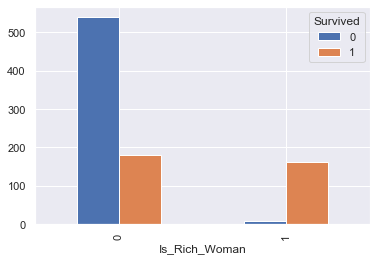

In [8]:
df = train_df[["Survived"]]
df["Is_Rich_Woman"] = train_features_df["Is_Rich_Woman"]

df.groupby(by = "Is_Rich_Woman")["Survived"].value_counts().unstack().plot.bar()
print(df.groupby(by = "Is_Rich_Woman")["Survived"].value_counts())
plt.show()

## Is_Poor_Man

- **Pclass = 3**
- **Sex = male**

In [9]:
train_features_df["Is_Poor_Man"] = np.where(
                            ((train_preprocessed_df["Pclass"] == 3) & (train_preprocessed_df["Sex"] == "male")),
                            1, 0)

In [10]:
test_features_df["Is_Poor_Man"] = np.where(
                            ((test_preprocessed_df["Pclass"] == 3) & (test_preprocessed_df["Sex"] == "male")),
                            1, 0)

In [11]:
train_features_df["Is_Poor_Man"].value_counts()

0    544
1    347
Name: Is_Poor_Man, dtype: int64

Is_Poor_Man  Survived
0            1           295
             0           249
1            0           300
             1            47
Name: Survived, dtype: int64


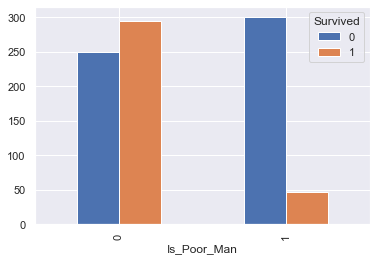

In [12]:
df = train_df[["Survived"]]
df["Is_Poor_Man"] = train_features_df["Is_Poor_Man"]

df.groupby(by = "Is_Poor_Man")["Survived"].value_counts().unstack().plot.bar()
print(df.groupby(by = "Is_Poor_Man")["Survived"].value_counts())
plt.show()

## Is_Alone

In [13]:
train_features_df["Is_Alone"] = np.where(train_preprocessed_df["Family"] == 0, 1, 0)
test_features_df["Is_Alone"] = np.where(test_preprocessed_df["Family"] == 0, 1, 0)

In [14]:
train_features_df["Is_Alone"].value_counts()

1    537
0    354
Name: Is_Alone, dtype: int64

Is_Alone  Survived
0         1           179
          0           175
1         0           374
          1           163
Name: Survived, dtype: int64


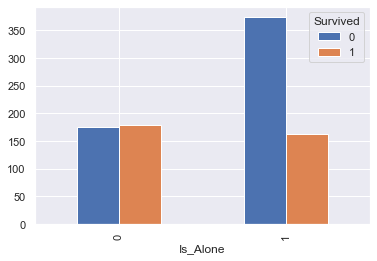

In [15]:
df = train_df[["Survived"]]
df["Is_Alone"] = train_features_df["Is_Alone"]

df.groupby(by = "Is_Alone")["Survived"].value_counts().unstack().plot.bar()
print(df.groupby(by = "Is_Alone")["Survived"].value_counts())
plt.show()

# Modeling

## With New Features

In [16]:
X, y = train_features_df.drop(["Age_label_enc", "Fare_label_enc"], axis = 1).values, train_df["Survived"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

print("Classification Accuracy - ", np.where(rfc.predict(X_test) == y_test, 1, 0).mean())
print("F1 Score - ", f1_score(y_true = y_test, y_pred = rfc.predict(X_test)))

Classification Accuracy -  0.8324022346368715
F1 Score -  0.7916666666666666


## Without New Features

In [17]:
X, y = train_features_df.drop(["Age_label_enc", "Fare_label_enc", "Is_Poor_Man", "Is_Rich_Woman", "Is_Alone"], axis = 1).values, train_df["Survived"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

print("Classification Accuracy - ", np.where(rfc.predict(X_test) == y_test, 1, 0).mean())
print("F1 Score - ", f1_score(y_true = y_test, y_pred = rfc.predict(X_test)))

Classification Accuracy -  0.8547486033519553
F1 Score -  0.8243243243243243
